# My First Data Science Project : Prison Break!!!

## Description

It's about prison breaks! In this project, we'll do the following:

* Obtain real data from the Internet and prepare it for analysis
* Analyze the data using Python
* Author our first portfolio project in Jupyter Notebook, to share code and communicate results

Specifically, we'll answer the following questions:

* In which year did the most attempts at breaking out of prison with a helicopter occur?
* In which countries do the most attempted helicopter prison escapes occur?

Let's Begin!!!!

We begin by importing some **helper** commands

In [48]:
from helper import *

Now let's get the data we need into Python. We will be getting our dataset of helicopter prison escapes straight from the Wikipedia article : https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes

Here's a sample:

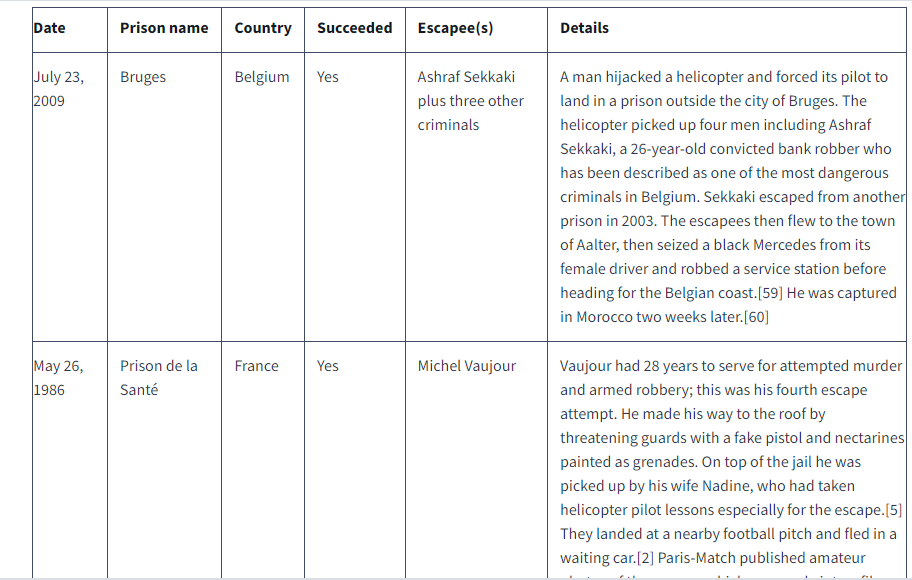

In [49]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data = data_from_url(url)

Let's print the first three rows

In [50]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 

## Removing Details Columns 

Remove **"Details"** column from each row of dataset

In [51]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1
 

Print the first three rows of data to confirm that the **"Details"** column is removed from each row of dataset

In [52]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']


## Replace Date format

You may have noticed that the dates seem to follow the format ***Month name  day, year***.we'll modify the date column to only include the ***year***

1. For each **row** in data, replace it's first element (**row[0]**) with **fetch_year(row[0])**.
2. Print the first few rows of **data** to confirm that you executed the task correctly.

In [53]:
for row in data:
    year = fetch_year(row[0])
    row[0] = year
    
for row in data[:3]:
    print(row)

[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
[1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
[1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']


## Attempts Per Year

The goal is to create a list of lists where each list has two elements:

1. A year
2. How many attempts occurred in the corresponding year

In [54]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

Before we move on, let's check what are the earliest and latest dates we have in our dataset.

In [55]:
print(min_year)
print(max_year)

1971
2020


Now we'll create a list of all the years ranging from **min_year** to **max_year**. 

Our goal is to then determine how many prison break attempts there were for each year. Since years in which there weren't any prison breaks aren't present in the dataset, this will make sure we capture them.

In [56]:
years = []
for y in range(min_year, max_year + 1):
    years.append(y)

Let's take a look at years to see if it looks like we expected.

In [57]:
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Create a list, **attempts_per_year**, whose elements all look like **[year, 0]**.
* The first element of each inner list should be one of the years of the list created in the second instruction.
* There should be no repeated years

Print the list above to track your progress.

In [58]:
attempts_per_year = []
for year in years:
    attempts_per_year.append([year,0])

print(attempts_per_year)

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


 we will increment the second entry of this element **attempts_per_year** by **1** everytime that year appears in **data**. 
 
Prescriptively, we will:

* Iterate over our starting data (stored in the variable **data**)
* For each iteration above, we will iterate over all the rows in **attempts_per_year**
* When the year in iteration over data matches the year in the iteration over **attempts_per_year**, we will increment the second entry of the element of **attempts_per_year** by **1**

In [59]:
for row in data:
    for ya in attempts_per_year:
        year = ya[0]
        if row[0]==year:
            ya[1] += 1
            
print(attempts_per_year)  

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


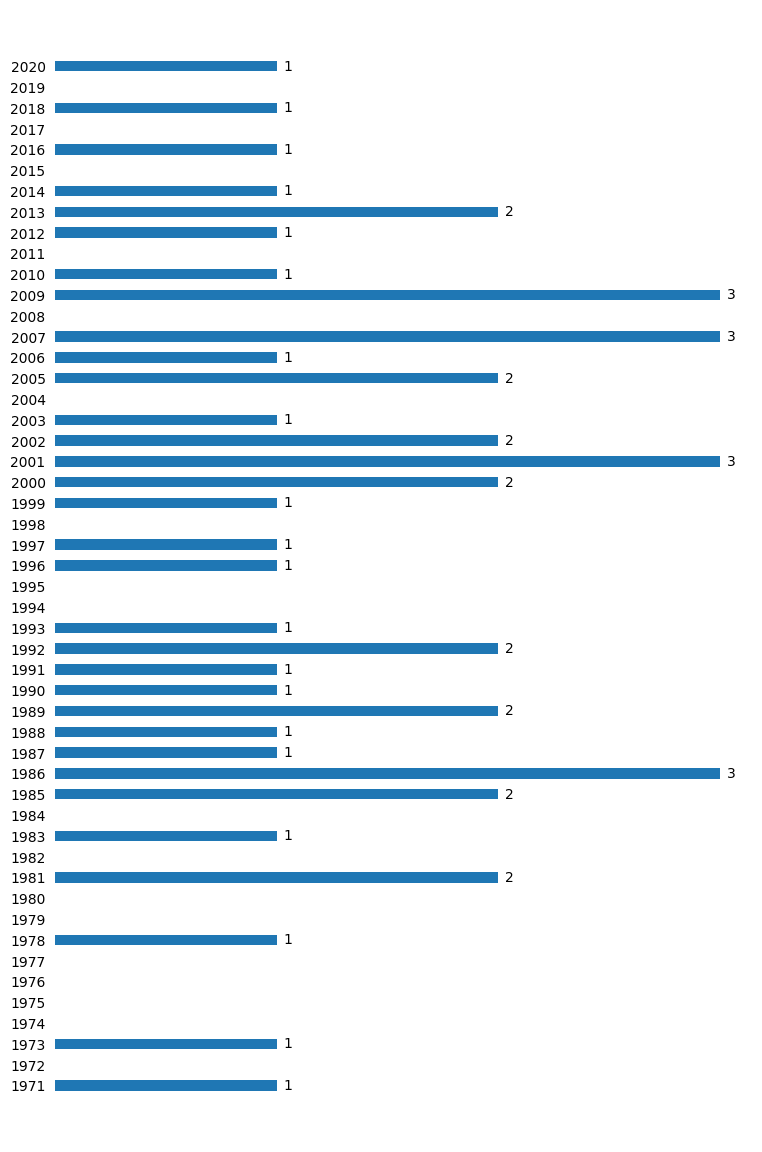

In [60]:
%matplotlib inline
barplot(attempts_per_year)

> **QUESTION:** In which year did the most attempts at breaking out of prison with a helicopter occur?

> **ANSWER:** The years in which the most helicopter prison break attempts occurred were 1986, 2001, 2007 and 2009, with a total of three attempts each.

## Attempts by Country

In [61]:
countries_frequency = df["Country"].value_counts()
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Belgium,4
Greece,4
Canada,4
Australia,2
Brazil,2
United Kingdom,2
Chile,1
Mexico,1


> **QUESTION:** In which countries do the most attempted helicopter prison escapes occur?

> **ANSWER:** By and far, the country with the most helicopter prison escape attempts is France.